# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:
1. Cities with the highest maximum temperatures are found within 20 degrees of latitude from the equator.
2. Cloudiness, humidity, and wind speed do not display consistent trends with distance from the equator. 
3. The greatest winds speeds are found above 60 degrees north latitude. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to your cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
ser = pd.Series(cities, copy=False)
ser_cap = ser.str.capitalize()
cities = ser_cap.tolist()
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL and request your results in Celsius

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
total = len(cities) 

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Build lists to hold output
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Get weather data for each city in list
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        index = cities.index(f'{city}')+1
        print(f'Processing Record {index} of {total} | {city}')
        response = requests.get(query_url + city).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt']) 
    except:
        print("City not found. Skipping...")
        pass
      
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 595 | Rikitea
Processing Record 2 of 595 | Kankaanpaa
Processing Record 3 of 595 | Bima
Processing Record 4 of 595 | Geraldton
Processing Record 5 of 595 | Hobart
Processing Record 6 of 595 | Trairi
Processing Record 7 of 595 | Sola
Processing Record 8 of 595 | Hualmay
Processing Record 9 of 595 | Kirakira
Processing Record 10 of 595 | New norfolk
Processing Record 11 of 595 | Kapaa
Processing Record 12 of 595 | Quixeramobim
Processing Record 13 of 595 | Yellowknife
Processing Record 14 of 595 | Faya
Processing Record 15 of 595 | Flinders
Processing Record 16 of 595 | Sitka
Processing Record 17 of 595 | Airai
Processing Record 18 of 595 | Rawson
Processing Record 19 of 595 | Vaini
Processing Record 20 of 595 | Ahipara
Processing Record 21 of 595 | Kysyl-syr
Processing Record 22 of 595 | Chuy
Processing Record 23 of 595 | Tautira
Processing Record 24 of 595 | Nova esperanca
Processing Record 25 of 595 | Punta 

Processing Record 195 of 595 | Rinteln
Processing Record 196 of 595 | Mehamn
Processing Record 197 of 595 | Cartagena
Processing Record 198 of 595 | Vetluga
Processing Record 199 of 595 | Mys shmidta
City not found. Skipping...
Processing Record 200 of 595 | Solnechnyy
Processing Record 201 of 595 | Eldikan
City not found. Skipping...
Processing Record 202 of 595 | Guerrero
Processing Record 203 of 595 | Margherita
Processing Record 204 of 595 | College
Processing Record 205 of 595 | Esperance
Processing Record 206 of 595 | Novomikhaylovskiy
Processing Record 207 of 595 | Nizhneyansk
City not found. Skipping...
Processing Record 208 of 595 | Edd
Processing Record 209 of 595 | Nanakuli
Processing Record 210 of 595 | Inverbervie
Processing Record 211 of 595 | Sanchor
Processing Record 212 of 595 | Belushya guba
City not found. Skipping...
Processing Record 213 of 595 | Vardo
Processing Record 214 of 595 | Grand river south east
City not found. Skipping...
Processing Record 215 of 595 | K

Processing Record 391 of 595 | Gushikawa
Processing Record 392 of 595 | Severo-yeniseyskiy
Processing Record 393 of 595 | Okhotsk
Processing Record 394 of 595 | Nagykoros
Processing Record 395 of 595 | Hutchinson
Processing Record 396 of 595 | Lagoa formosa
Processing Record 397 of 595 | Moctezuma
Processing Record 398 of 595 | Luvianos
Processing Record 399 of 595 | Santa isabel do rio negro
Processing Record 400 of 595 | Dese
Processing Record 401 of 595 | Dera bugti
Processing Record 402 of 595 | Kisangani
Processing Record 403 of 595 | Wanaka
Processing Record 404 of 595 | Poum
Processing Record 405 of 595 | Tezu
Processing Record 406 of 595 | Road town
Processing Record 407 of 595 | Angra dos reis
Processing Record 408 of 595 | Kushmurun
Processing Record 409 of 595 | Nosy varika
Processing Record 410 of 595 | Boa vista
Processing Record 411 of 595 | Cherskiy
Processing Record 412 of 595 | Kano
Processing Record 413 of 595 | Karratha
Processing Record 414 of 595 | Sorong
Processin

Processing Record 585 of 595 | Saryshagan
City not found. Skipping...
Processing Record 586 of 595 | Tonekabon
Processing Record 587 of 595 | Oistins
Processing Record 588 of 595 | Saint-ambroise
Processing Record 589 of 595 | Cockburn town
Processing Record 590 of 595 | Makakilo city
Processing Record 591 of 595 | Bilibino
Processing Record 592 of 595 | Posse
Processing Record 593 of 595 | Phan rang
City not found. Skipping...
Processing Record 594 of 595 | Sarkand
Processing Record 595 of 595 | Sur
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Build dataframe from lists
city_data = pd.DataFrame({
    'City': City,
    'Latitude': Lat,
    'Longitude': Lng,
    'Max Temp. (F)': Max_Temp,
    'Humidity (%)': Humidity,
    'Cloudiness (%)': Cloudiness,
    'Wind Speed (mph)': Wind_Speed,
    'Country Code': Country,
    'Date': Date
})

#Export data to CSV
city_data.to_csv('Outputs/city_data.csv')

In [6]:
#Visualize data
city_data.head()

,City,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date
0,Rikitea,-23.1203,-134.9692,73.53,71,0,14.00,PF,1632235966
1,Kankaanpää,61.8000,22.4167,48.96,55,34,1.79,FI,1632235966
2,Bima,-8.4667,118.7167,76.86,84,90,1.68,ID,1632235967
3,Geraldton,-28.7667,114.6000,52.21,87,0,5.75,AU,1632235967
4,Hobart,-42.8794,147.3294,53.46,76,98,4.00,AU,1632235968


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data.sort_values(by=['Humidity (%)'], ascending=False)

#This dataframe does not contain humidity values >100%

,City,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date
341,Flin Flon,54.7682,-101.8650,42.64,100,20,0.00,CA,1632236114
388,Kiryat Gat,31.6100,34.7642,89.40,100,0,13.53,IL,1632235985
322,Barabai,-2.5833,115.3833,73.15,99,100,1.14,ID,1632236106
409,Rantepao,-2.9701,119.8978,65.80,99,100,1.81,ID,1632236142
505,Kiunga,-6.1219,141.2906,72.86,99,100,2.98,PG,1632236182
...,...,...,...,...,...,...,...,...,...
439,Tabas,33.5959,56.9244,92.28,9,23,8.99,IR,1632236154
308,Bilma,18.6853,12.9164,101.82,7,4,5.30,NE,1632236098
266,Arlit,18.7369,7.3853,104.25,7,1,4.50,NE,1632236082
436,Mookane,-23.6880,26.6595,91.54,7,0,4.56,BW,1632236153


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

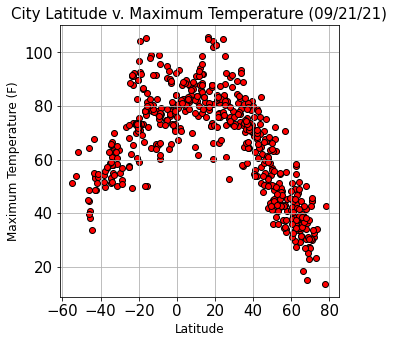

In [9]:
# Generate temperature scatterplot 

Latitude = city_data['Latitude']
Temperature = city_data['Max Temp. (F)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Maximum Temperature (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Maximum Temperature (F)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Temperature, marker="o", color="red",edgecolors='black')
plt.savefig('Outputs/Temp.png')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and maximum temperature on September 21. The plot shows that maximum temperatures decrease moving away from the equator. 

## Latitude vs. Humidity Plot

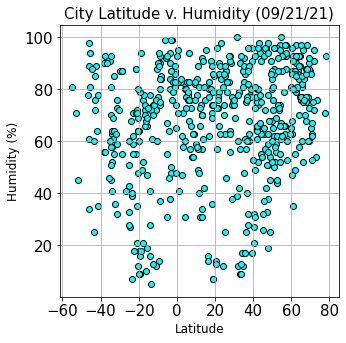

In [10]:
# Generate humidity scatterplot 

Latitude = city_data['Latitude']
Humidity = city_data['Humidity (%)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Humidity (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Humidity (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Humidity, marker="o", color="aqua",edgecolors='black')
plt.savefig('Outputs/Humidity.png')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and percent humidity on September 21. The plot shows no relationship between distance from the equator and percent humidity. 

## Latitude vs. Cloudiness Plot

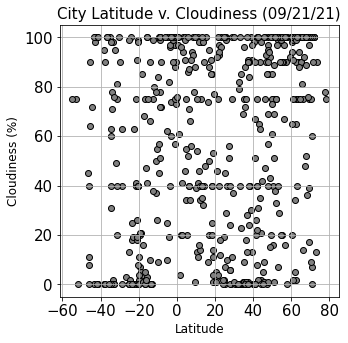

In [11]:
# Generate cloudiness scatterplot 

Latitude = city_data['Latitude']
Clouds = city_data['Cloudiness (%)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Cloudiness (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Cloudiness (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Clouds, marker="o", color="grey",edgecolors='black')
plt.savefig('Outputs/Clouds.png')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and cloud cover on September 21. The plot shows no relationship between distance from the equator and cloud cover.

## Latitude vs. Wind Speed Plot

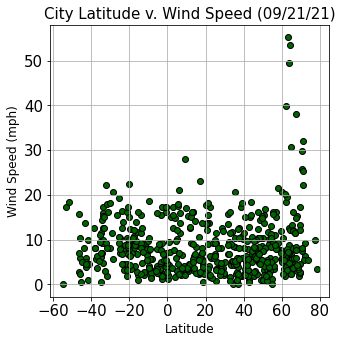

In [12]:
# Generate Wind Speed scatterplot 

Latitude = city_data['Latitude']
Wind = city_data['Wind Speed (mph)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Wind Speed (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Wind Speed (mph)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Wind, marker="o", color="darkgreen",edgecolors='black')
plt.savefig('Outputs/Wind.png')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and wind speed on September 21. The plot shows a slight increase in wind speed at distances from north of the equator, but overall, there is no consistent trend.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation coefficient = -0.87
Linear regression model: y = -0.86x + 97.2
P-Value = 4.667470760014803e-113


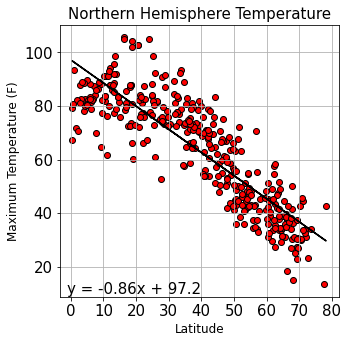

In [13]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Max Temp. (F)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Temperature", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Maximum Temperature (F)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="red",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-1,10),fontsize=15,color="black")
plt.savefig('Outputs/Temp_north_regression.png')
plt.show()

In [ ]:
#There is a significant, negative correlation between latitute and maximum temperature in the northern hemisphere; maximum temperature decreases as distance from the equator increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation coefficient = 0.68
Linear regression model: y = 0.72x + 85.52
P-Value = 1.0985884712258723e-24


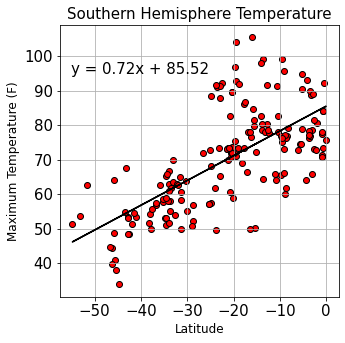

In [14]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Max Temp. (F)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Temperature", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Maximum Temperature (F)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="red",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-55,95),fontsize=15,color="black")
plt.savefig('Outputs/Temp_south_regression.png')
plt.show()

In [ ]:
#There is a significant positive correlation between latitude and maximum temperature in the southern hemisphere; maximum temperature decreases as distance from the equator increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation coefficient = 0.16
Linear regression model: y = 0.17x + 63.32
P-Value = 0.0017493523725182168


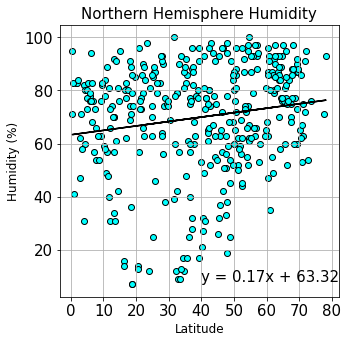

In [23]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Humidity (%)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Humidity", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Humidity (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="aqua",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(40,8),fontsize=15,color="black")
plt.savefig('Outputs/Humidity_north_regression.png')
plt.show()

In [ ]:
#There is not a strong correlation between city latitude and percent humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation coefficient = 0.05
Linear regression model: y = 0.09x + 65.13
P-Value = 0.5101451261416123


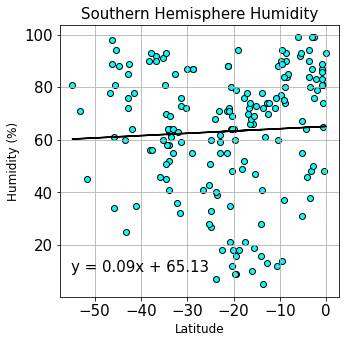

In [24]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Humidity (%)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Humidity", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Humidity (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="aqua",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-55,10),fontsize=15,color="black")
plt.savefig('Outputs/Humidity_south_regression.png')
plt.show()

In [ ]:
#There is no significant correlation between city latitude and percent humidity in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation coefficient = 0.22
Linear regression model: y = 0.41x + 43.9
P-Value = 1.779944519516761e-05


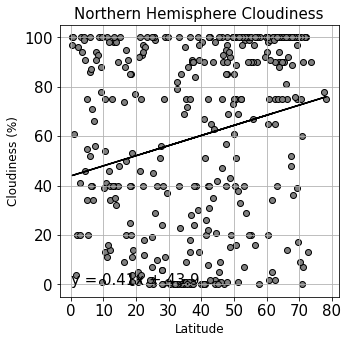

In [25]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Cloudiness (%)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Cloudiness", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Cloudiness (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="grey",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(0,0),fontsize=15,color="black")
plt.savefig('Outputs/Clouds_north_regression.png')
plt.show()

In [ ]:
#There is not a strong correlation between city latitude and percent cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation coefficient = 0.23
Linear regression model: y = 0.65x + 64.25
P-Value = 0.002727207146238139


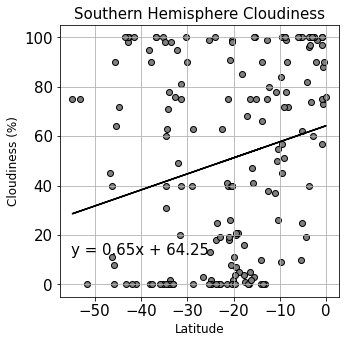

In [18]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Cloudiness (%)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Cloudiness", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Cloudiness (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="grey",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-55,12),fontsize=15,color="black")
plt.savefig('Outputs/Clouds_south_regression.png')
plt.show()

In [ ]:
#There is no significant correlation between city latitude and percent cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation coefficient = 0.14
Linear regression model: y = 0.05x + 6.53
P-Value = 0.008105243382374845


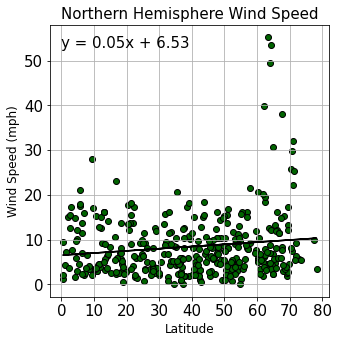

In [28]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Wind Speed (mph)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Wind Speed", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Wind Speed (mph)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="darkgreen",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(0,53),fontsize=15,color="black")
plt.savefig('Outputs/Wind_north_regression.png')
plt.show()

In [ ]:
#There is no significant correlation between city latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation coefficient = -0.14
Linear regression model: y = -0.05x + 7.2
P-Value = 0.06226440333230931


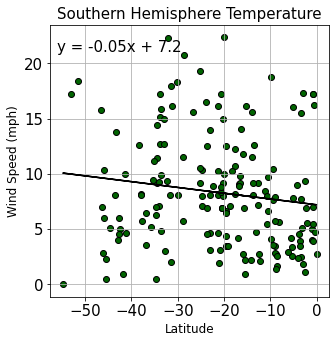

In [31]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Wind Speed (mph)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Temperature", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Wind Speed (mph)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="darkgreen",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-56,21),fontsize=15,color="black")
plt.savefig('Outputs/Wind_south_regression.png')
plt.show()

In [ ]:
#There is no significant correlation between wind speed and city latitude in the Southern Hemisphere. 